c:\users\romain\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
c:\users\romain\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


[ 9.68021332e+06+1.33582034e-10j -1.99535348e+01-1.25092679e+01j
 -2.74310195e+01-1.17486274e+01j ... -4.15384481e+01+1.31754268e+01j
 -2.74310195e+01+1.17486274e+01j -1.99535348e+01+1.25092679e+01j]
[ 9.68023244e+06+1.69961822e-10j -1.12719956e+01-1.48134551e+01j
 -8.55946441e+00-1.33908206e+01j ... -8.09301703e+00+8.81186610e+00j
 -8.55946441e+00+1.33908206e+01j -1.12719956e+01+1.48134551e+01j]
[ 9.68026028e+06+1.71894499e-10j -2.81742442e-01-2.72948426e+01j
 -1.00009226e+01-1.86659840e+01j ... -1.03350276e+01+2.09538369e+01j
 -1.00009226e+01+1.86659840e+01j -2.81742442e-01+2.72948426e+01j]
[ 9.68020172e+06+9.81117410e-11j -7.18121690e+00-1.18387504e+01j
 -1.14599707e+01-1.77320748e+00j ... -1.82973027e+01+7.71074755e+00j
 -1.14599707e+01+1.77320748e+00j -7.18121690e+00+1.18387504e+01j]
[ 9.68027739e+06+1.80307325e-10j  1.10017395e+01-2.47879168e+01j
 -2.76689326e-01-2.32835019e+01j ... -2.71779187e+00+1.28812448e+01j
 -2.76689326e-01+2.32835019e+01j  1.10017395e+01+2.47879168e+01j]


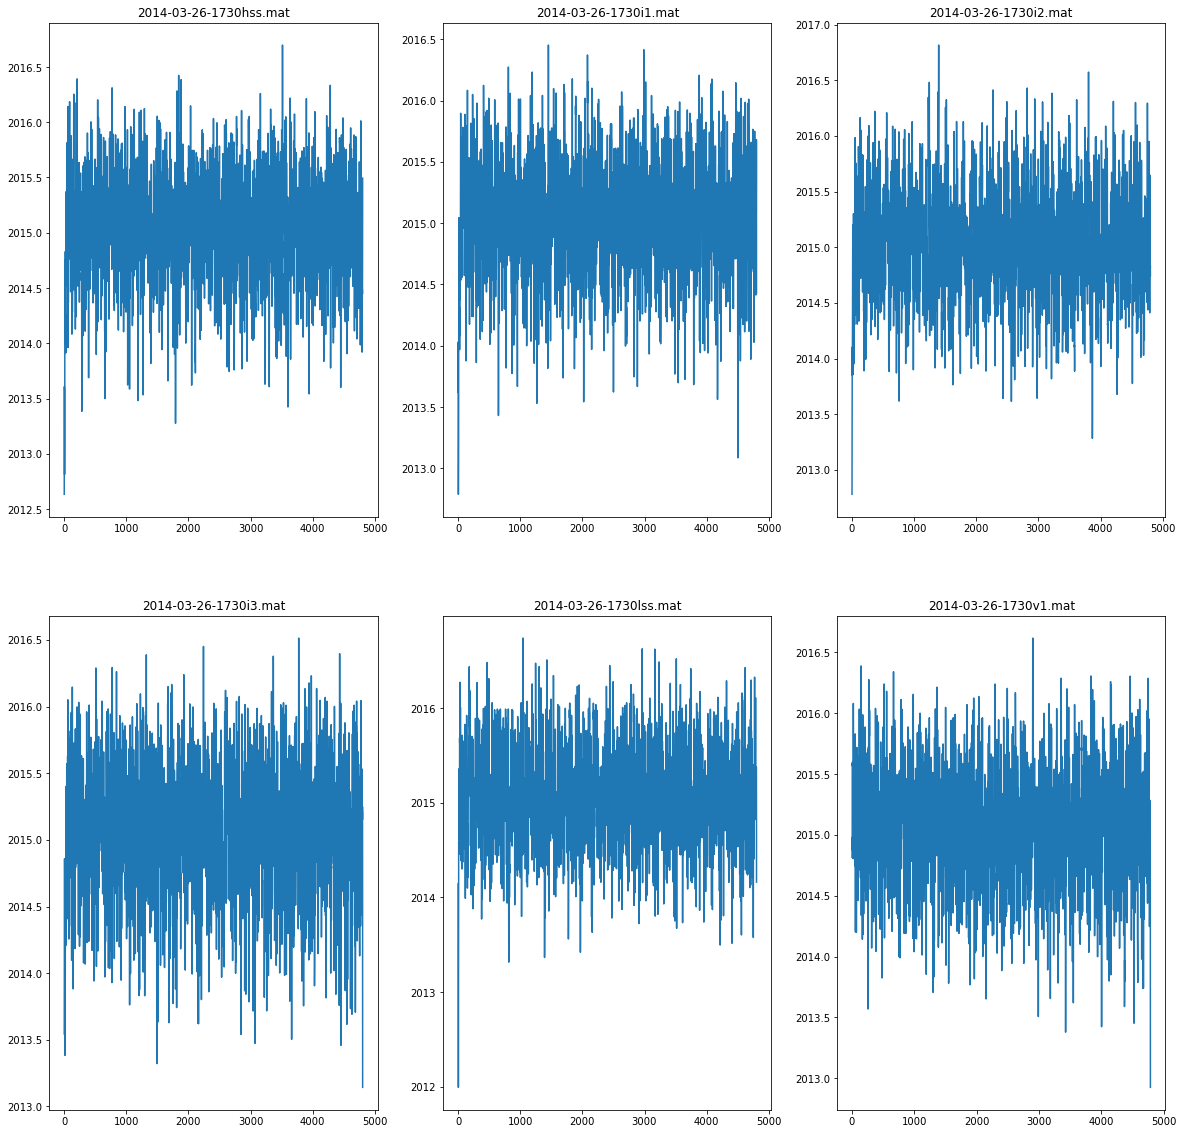

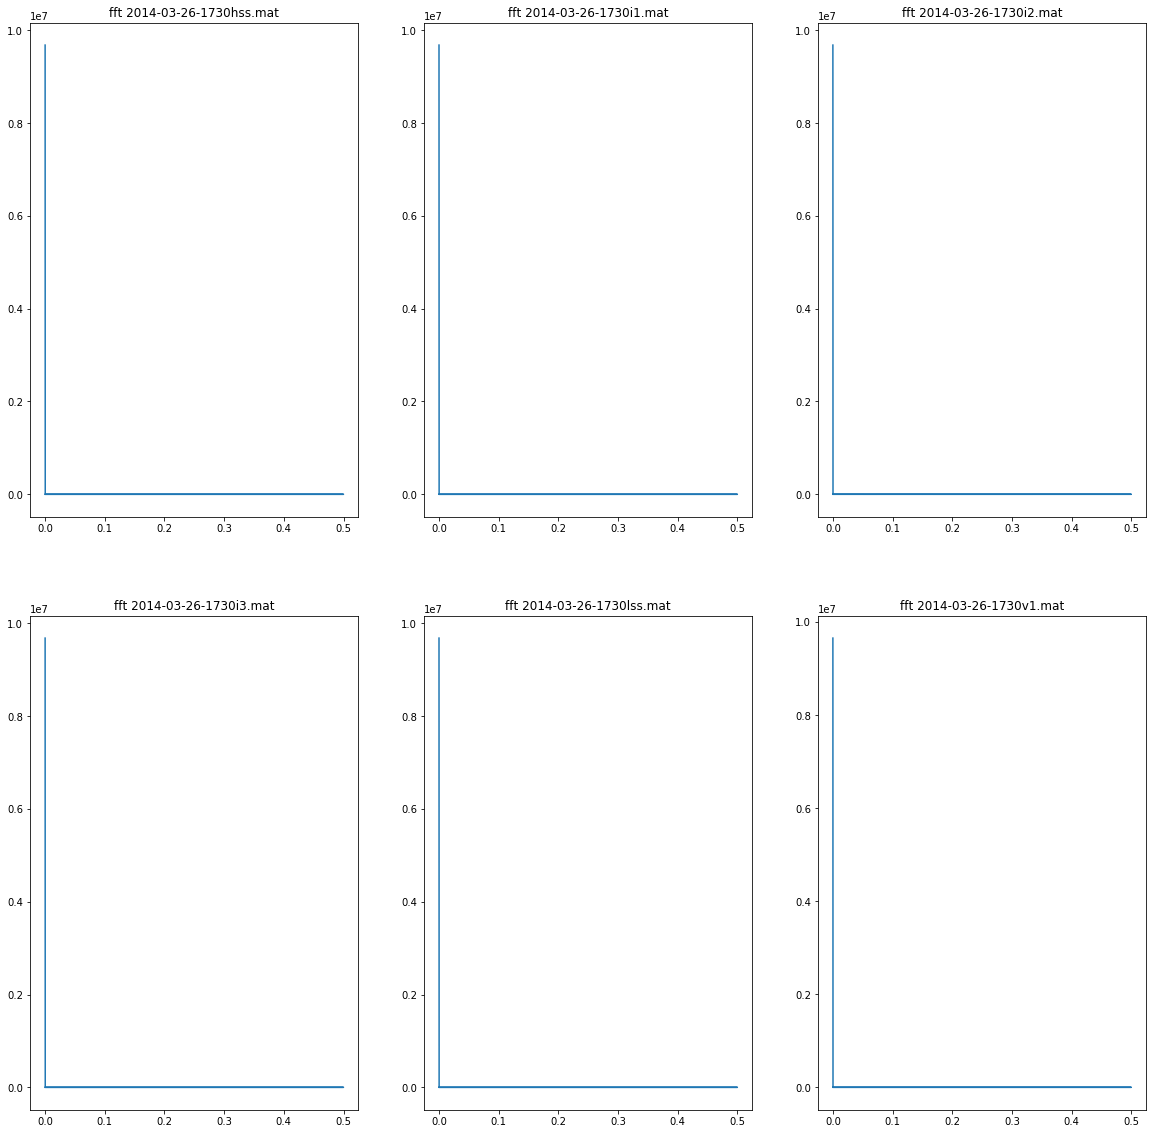

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
from mat4py import loadmat
from os import listdir
from os.path import isfile, join
myPath = "./data/"

files = [f for f in listdir(myPath) if isfile(join(myPath, f))]
files.pop(0)
 
keywords  = ['hss', 'i1', 'i2', 'i3', 'lss', 'v1', 'v2', 'v3', 'vib1', 'vib2', 'vib3']
keyword = keywords[0]
loaded_data = []
for file in files:
    if keyword in file:
        loaded_data.append(loadmat(myPath+file))

data = []
for i in range(len(loaded_data)):
    a = loaded_data[i]
    b = a[keyword]
    data.append(b["rawData"])
#TODO generate time  axis from sampling time  

for i in range(14): #data correction
    data[-1].pop(-1)
plt.figure(1, figsize = (20,20))
plt.figure(2, figsize = (20,20))
for i in range(len(data)):
        
    plt.figure(1)
    plt.subplot(231+i)
    plt.plot(data[i])
    plt.title(files[i])
    
    plt.figure(2)
    plt.subplot(231+i)
    ft = np.fft.fft(data[i])
    np.delete(ft, np.max(ft))
    ftFreq = np.abs(np.fft.fftfreq(len(data[i])))
    plt.plot(ftFreq, ft)
    plt.title("fft " + files[i])
    
    print(ft)